In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df: pd.DataFrame = pd.read_csv("./data/processed_trainv2.csv")

In [4]:
df.head()

,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,A,B,C,YEAR,MONTH,DAY,WEEKDAY,HR,MIN,TARGET
0,0.0,0,367,0,0,1,2013,6,30,6,17,0,345
1,0.0,7,371,0,1,0,2013,6,30,6,17,8,285
2,0.0,0,204,0,0,1,2013,6,30,6,17,2,975
3,0.0,0,330,0,0,1,2013,6,30,6,17,0,645
4,0.0,0,217,0,0,1,2013,6,30,6,17,4,435


In [5]:
mean, std = df["TARGET"].mean(), df["TARGET"].std()
df = df[df["TARGET"] < mean + 5 * std]

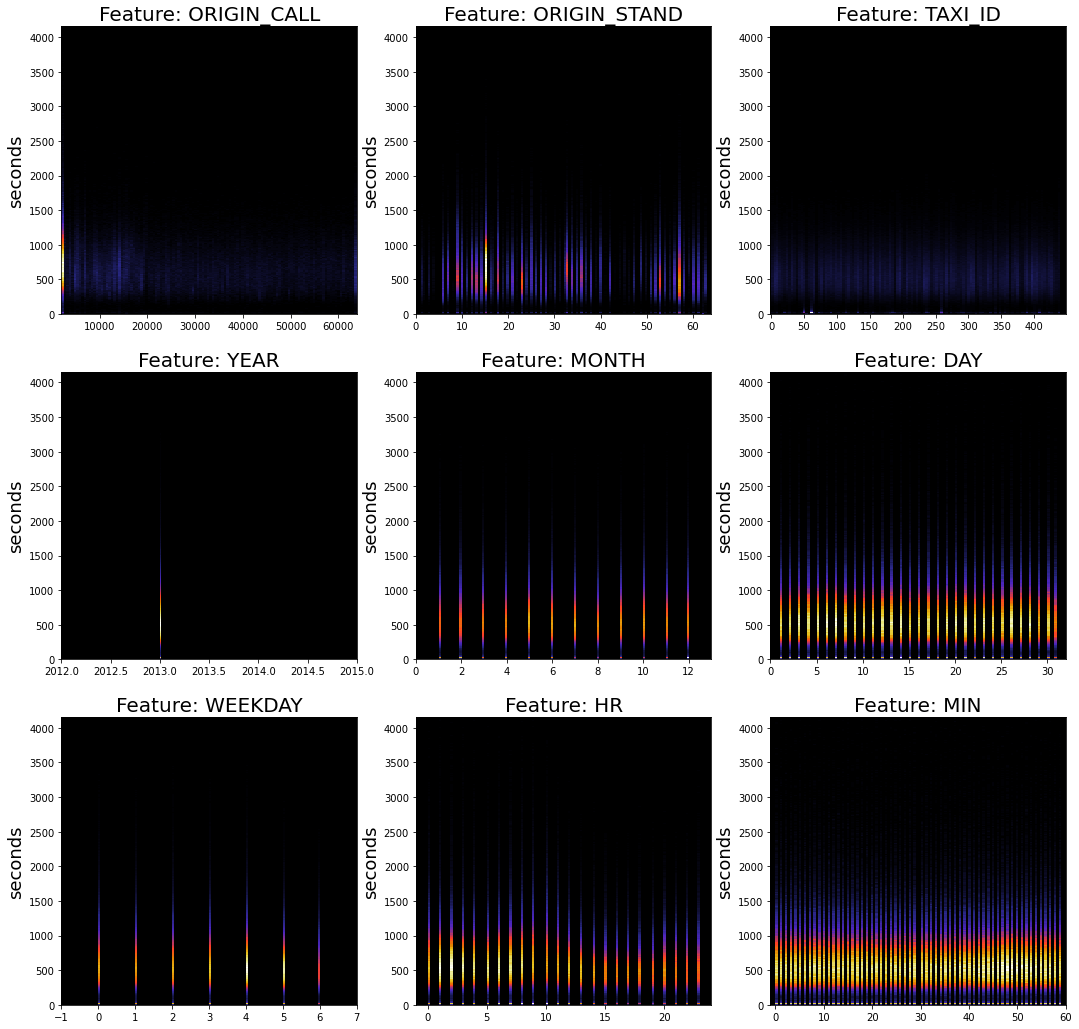

In [6]:
%matplotlib inline
buckets = (int(mean + 5 * std) // 15)
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

for idx, v in enumerate(["ORIGIN_CALL", "ORIGIN_STAND", "TAXI_ID", "YEAR", "MONTH", "DAY", "WEEKDAY", "HR", "MIN"]):
    ax: plt.Axes = axs[idx // 3, idx % 3]
    if "ORIGIN_" in v:
        ax.hist2d(df[df[v] != 0][v][:-1], df[df[v] != 0]["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))
    else:
        ax.hist2d(df[v][:-1], df["TARGET"][:-1], cmap="CMRmap", bins=(120, buckets))

    ax.set_xlim(ax.get_xlim()[0] - 1, ax.get_xlim()[1] + 1)
    ax.set_facecolor("black")
    ax.set_ylabel("seconds", fontsize=18)
    ax.set_title(f"Feature: {v}", fontsize=20)

plt.show()

In [7]:
df["ORIGIN_CALL"][:-1]

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1710654    0.0
1710655    0.0
1710656    0.0
1710657    0.0
1710658    0.0
Name: ORIGIN_CALL, Length: 1703183, dtype: float64